In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv("/kaggle/input/titanic-dataset/Titanic-Dataset.csv")

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
print("Column Wise Percentage Null Values: ")
print(data.isnull().sum()*100/891)

Column Wise Percentage Null Values: 
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
print("Total number of data points:", len(data))

Total number of data points: 891


In [9]:
for i in data.columns:
    print(data[i].value_counts())
    print("\n\n\n")

PassengerId
1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: count, Length: 891, dtype: int64




Survived
0    549
1    342
Name: count, dtype: int64




Pclass
3    491
1    216
2    184
Name: count, dtype: int64




Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64




Sex
male      577
female    314
Name: count, dtype: int64




Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92     

# **Handling Missing Values** 

"Cabin" Column has 77% null values, therefore, it is wise to drop that column altogether, because an attempt to impute missing values would lead to 77% fabricated data which is not good for any purpose.

"Age" Column has 19% null values, thus, it would not be good to drop the column but instead impute the null values. Since, age may be highly correlated with only the gender, thus, we may impute average age of females and males in respective rows.

"Embarked" Column has only 2 null values, and since, it is a categorical column, it would be wise to impute the null values with the mode, that is, the most occuring value which is S.

In [10]:
data.drop('Cabin', axis = 1, inplace = True)

In [11]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [12]:
for i in range(len(data)):
    if(pd.isnull(data['Embarked'][i])):
        data['Embarked'][i] = 'S'

/tmp/ipykernel_35/2246699362.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['Embarked'][i] = 'S'
/tmp/ipykernel_35/2246699362.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the

In [13]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [14]:
maleAvgAge = np.mean(data[(data['Age'].isnull()==False) & (data['Sex'] == 'male')]['Age'])

In [15]:
femaleAvgAge = np.mean(data[(data['Age'].isnull()==False) & (data['Sex'] == 'female')]['Age'])

In [16]:
for i in range(len(data)):
    if(pd.isnull(data['Age'][i])):
        if data['Sex'][i] == 'male':
            data['Age'][i] = maleAvgAge
        elif data['Sex'][i] == 'female':
            data['Age'][i] = femaleAvgAge

/tmp/ipykernel_35/1261559251.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['Age'][i] = maleAvgAge
/tmp/ipykernel_35/1261559251.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See t

In [17]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [18]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,30.726645,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,C


# **Categorical to numerical features**

In [19]:
for i,j in dict(data.dtypes).items():
    if(j == 'object'):
        data[i] = data[i].astype('category').cat.codes

In [20]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name             int16
Sex               int8
Age            float64
SibSp            int64
Parch            int64
Ticket           int16
Fare           float64
Embarked          int8
dtype: object

# **Normalizing**
We can normalize Age, SibSp, Parch, Fare.
Other Columns have very less variance, or are categorical variables and therefore, we may not normalize them.

In [21]:
NormList = ['Age', 'SibSp', 'Parch', 'Fare']
for i in NormList:
    data[i] = (data[i]-np.mean(data[i]))/(max(data[i])-min(data[i]))

In [22]:
data.describe()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,8.910000e+02,8.910000e+02,8.910000e+02,891.000000,8.910000e+02,891.000000
mean,446.000000,0.383838,2.308642,445.000000,0.647587,-2.392400e-17,4.984166e-19,-1.744458e-18,338.528620,-7.476249e-19,1.536476
std,257.353842,0.486592,0.836071,257.353842,0.477990,1.635448e-01,1.378429e-01,1.343429e-01,200.850657,9.699511e-02,0.791503
min,1.000000,0.000000,1.000000,0.000000,0.000000,-3.683844e-01,-6.537598e-02,-6.359895e-02,0.000000,-6.285843e-02,0.000000
25%,223.500000,0.000000,2.000000,222.500000,0.000000,-9.721078e-02,-6.537598e-02,-6.359895e-02,158.500000,-4.741836e-02,1.000000
50%,446.000000,0.000000,3.000000,445.000000,1.000000,3.316986e-03,-6.537598e-02,-6.359895e-02,337.000000,-3.464571e-02,2.000000
75%,668.500000,1.000000,3.000000,667.500000,1.000000,6.614684e-02,5.962402e-02,-6.359895e-02,519.500000,-2.350457e-03,2.000000
max,891.000000,1.000000,3.000000,890.000000,1.000000,6.316156e-01,9.346240e-01,9.364010e-01,680.000000,9.371416e-01,2.000000


# **Vizualising Outliers using Box Plot**

In [23]:
import matplotlib.pyplot as plt

([<matplotlib.axis.XTick at 0x7e9bae096650>,
 [Text(1, 0, 'Survived'),
  Text(2, 0, 'Pclass'),
  Text(3, 0, 'Sex'),
  Text(4, 0, 'Age'),
  Text(5, 0, 'SibSp'),
  Text(6, 0, 'Parch'),
  Text(7, 0, 'Fare'),
  Text(8, 0, 'Embarked')])

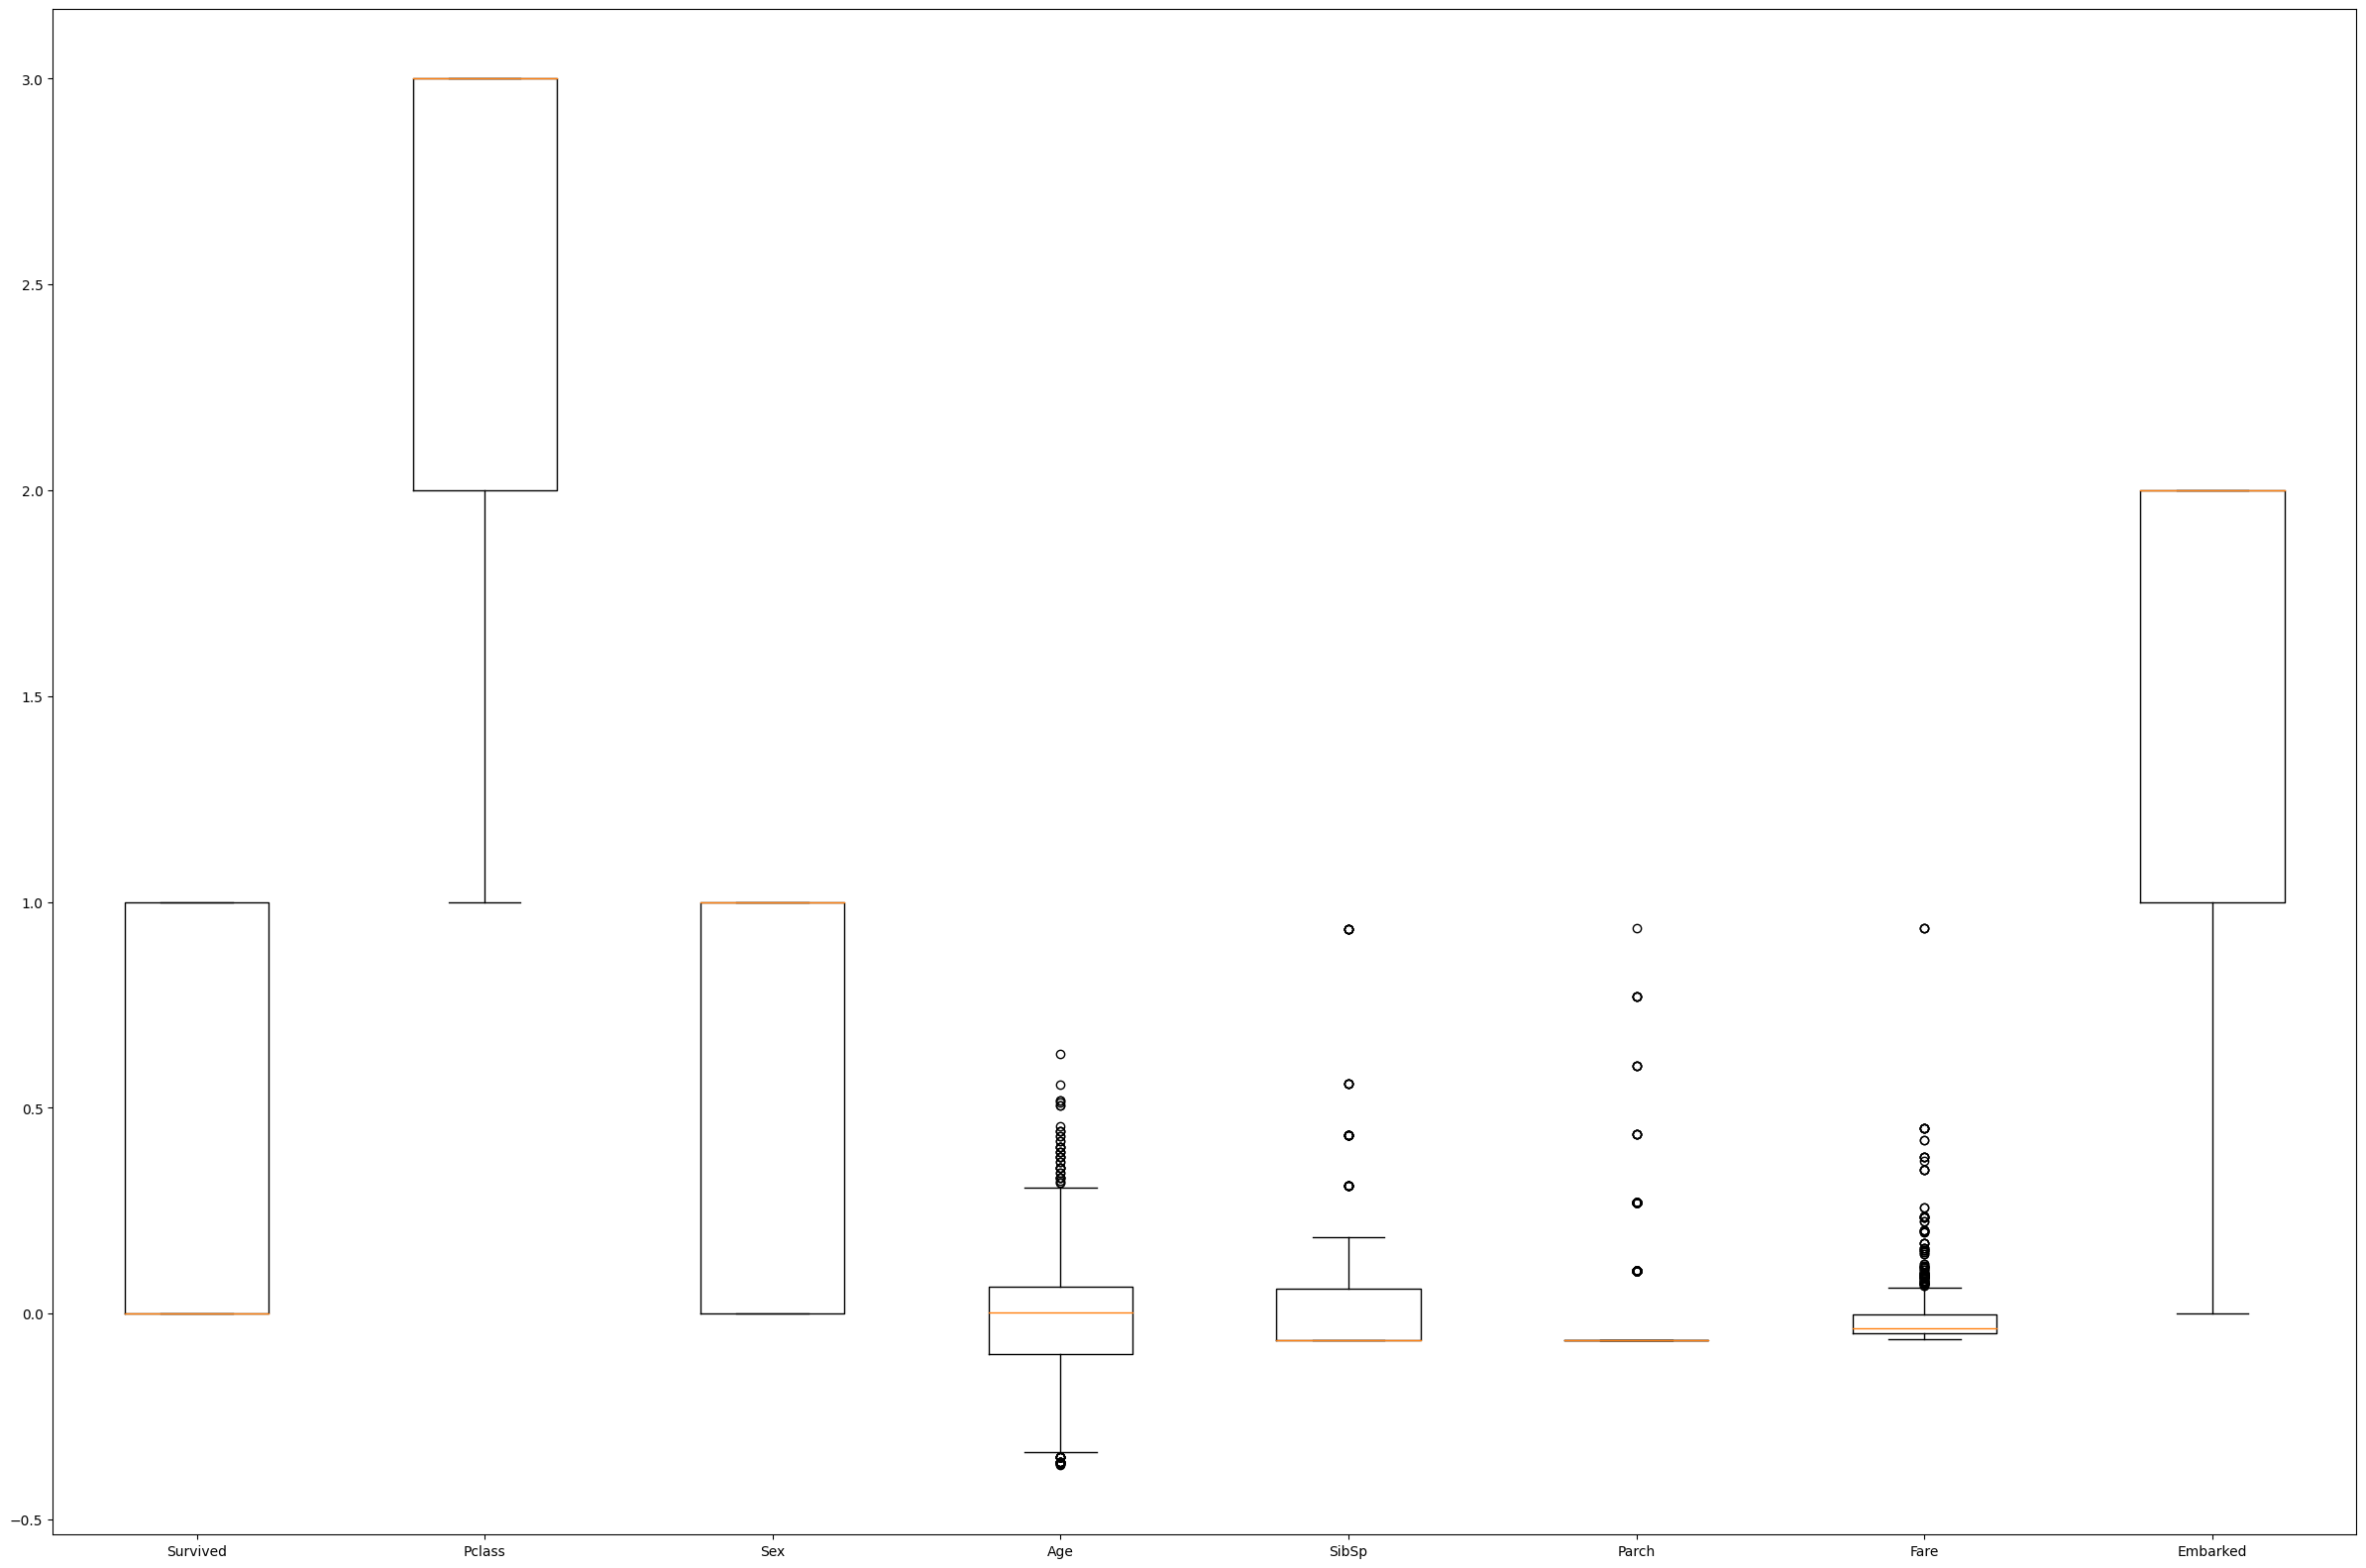

In [32]:
fig = plt.figure(figsize=(30,20))
plt.boxplot(data.drop(['PassengerId', 'Name', 'Ticket'], axis = 1))
plt.xticks([1,2,3,4,5,6,7,8], data.drop(['PassengerId', 'Name', 'Ticket'], axis = 1).columns)

In [35]:
data.to_csv("Preprocessed Data.csv")